***Importing Libraries***

In [265]:
import warnings #Used to manage warning messages in Python
import sys #Provides access to system-specific parameters and functions
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import pandas as pd #A powerful library for data manipulation and analysis
import numpy as np #Focused on numerical computations. It provides support for arrays, matrices, and mathematical functions
import matplotlib.pyplot as plt #used for creating static, interactive, and animated visualizations like line plots, bar graphs, histograms, etc.
import seaborn as sns #this library simplifies creating visually appealing and informative statistical graphics such as heatmaps and pair plots
 
from scipy.stats import skew # tools for statistical computations such as calculating skewness, probability distributions, and hypothesis testing.

# Import Counter from collections
# from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest, chi2,f_regression,f_classif
from sklearn.linear_model import LinearRegression #Implements a simple and commonly used linear regression algorithm for predicting continuous outcomes.
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor # decision tree regression model that splits the data into regions to make 
                                               #predictions based on tree-like structures.
from sklearn.ensemble import RandomForestRegressor  # A powerful regression model that uses collection of decision trees to improve predictions 
from sklearn.ensemble import GradientBoostingRegressor # method that builds models iteratively to correct the errors of its predecessors 
                                                        #for achieving high accuracy
from sklearn.svm import SVR # Implements Support Vector Regression, a technique that aims to fit the best possible hyperplane for predicting 
                            #continuous values
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler #Used for feature scaling in machine learning.
from sklearn.model_selection import train_test_split #Splits datasets into training and testing subsets
# from sklearn.linear_model import LinearRegression #Implements a simple and commonly used linear regression algorithm for predicting continuous outcomes. 
                                                   # eg: predicting the length of hospital stays based on patient demographics and conditions
from sklearn.metrics import mean_squared_error



***load data for pre proccessing***

In [378]:
# Specify the path to your CSV file
csv_file_path = ('C:/Users/asus/healthcare-dataset.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv('healthcare-dataset.csv')

# Display the first few rows of the dataset
display(df.head(10))


,encounter_id,patient_id,name,age,gender,blood_type,medical_condition,doctor_id,doctor,hospital_id,hospital,insurance_provider_id,insurance_provider,billing_amount,room_number,admission_type,date_of_admission,discharge_date,medication,test_results,length_of_stay
0,1,48559735,Tiffany Ramirez,81,Female,O-,Diabetes,24379,Patrick Parker,8130,Wallace-Hamilton,17536,Medicare,37490.983364,146,Elective,2022-11-17,2022-12-01,Aspirin,Inconclusive,14
1,2,68988993,Ruben Burns,35,Male,O+,Asthma,54845,Diane Jackson,7856,"Burke, Griffin and Cooper",97562,UnitedHealthcare,47304.064845,404,Emergency,2023-06-01,2023-06-15,Lipitor,Normal,14
2,3,57429465,Chad Byrd,61,Male,B-,Obesity,88087,Paul Baker,4494,Walton LLC,36710,Medicare,36874.896997,292,Emergency,2019-01-09,2019-02-08,Lipitor,Normal,30
3,4,44487379,Antonio Frederick,49,Male,B-,Asthma,22426,Brian Chandler,8117,Garcia Ltd,70210,Medicare,23303.322092,480,Urgent,2020-05-02,2020-05-03,Penicillin,Abnormal,1
4,5,57789449,Mrs. Brandy Flowers,51,Male,O-,Arthritis,84765,Dustin Griffin,7259,"Jones, Brown and Murray",92038,UnitedHealthcare,18086.344184,477,Urgent,2021-07-09,2021-08-02,Paracetamol,Normal,24
5,6,92656382,Patrick Parker,41,Male,AB+,Arthritis,14020,Robin Green,1256,Boyd PLC,41362,Aetna,22522.363385,180,Urgent,2020-08-20,2020-08-23,Aspirin,Abnormal,3
6,7,75616756,Charles Horton,82,Male,AB+,Hypertension,39306,Patricia Bishop,6810,"Wheeler, Bryant and Johns",75062,Cigna,39593.435761,161,Urgent,2021-03-22,2021-04-15,Lipitor,Abnormal,24
7,8,82900421,Patty Norman,55,Female,O-,Arthritis,79748,Brian Kennedy,5228,Brown Inc,71030,Blue Cross,13546.817249,384,Elective,2019-05-16,2019-06-02,Aspirin,Normal,17
8,9,43828145,Ryan Hayes,33,Male,A+,Diabetes,90980,Kristin Dunn,9540,"Smith, Edwards and Obrien",40027,Aetna,24903.037270,215,Elective,2020-12-17,2020-12-22,Aspirin,Abnormal,5
9,10,65979398,Sharon Perez,39,Female,O-,Asthma,18692,Jessica Bailey,7152,Brown-Golden,75453,Blue Cross,22788.236026,310,Urgent,2022-12-15,2022-12-16,Aspirin,Normal,1


***To print the dimensions of a DataFrame*** 

In [353]:
df.shape

(10000, 42)

***To print the index range,column names & count of non_null  values***

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   encounter_id                         10000 non-null  int64  
 1   patient_id                           10000 non-null  int64  
 2   age                                  10000 non-null  int64  
 3   gender                               10000 non-null  int64  
 4   doctor_id                            10000 non-null  int64  
 5   doctor                               10000 non-null  int64  
 6   hospital_id                          10000 non-null  int64  
 7   hospital                             10000 non-null  int64  
 8   insurance_provider_id                10000 non-null  int64  
 9   billing_amount                       10000 non-null  float64
 10  room_number                          10000 non-null  int64  
 11  length_of_stay               

***To get summary of statistical measures for the numerical columns***

In [358]:
df.describe()

,encounter_id,patient_id,age,gender,doctor_id,doctor,hospital_id,hospital,insurance_provider_id,billing_amount,room_number,length_of_stay
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,5.499700e+07,51.452200,0.492500,55276.378200,1.141600,5570.275300,1.669000,55131.390700,25516.806778,300.082000,15.561800
std,2886.89568,2.591835e+07,19.588974,0.499969,26057.500342,0.478511,2593.517205,2.005403,26074.784197,14067.292709,115.806027,8.612038
min,1.00000,1.000220e+07,18.000000,0.000000,10039.000000,1.000000,1000.000000,1.000000,10003.000000,1000.180837,101.000000,1.000000
25%,2500.75000,3.262032e+07,35.000000,0.000000,32990.250000,1.000000,3347.750000,1.000000,32650.500000,13506.523967,199.000000,8.000000
50%,5000.50000,5.523416e+07,52.000000,0.000000,54996.500000,1.000000,5610.000000,1.000000,55713.000000,25258.112566,299.000000,16.000000
75%,7500.25000,7.735011e+07,68.000000,1.000000,77987.250000,1.000000,7835.250000,1.000000,77361.750000,37733.913727,400.000000,23.000000
max,10000.00000,9.999747e+07,85.000000,1.000000,99997.000000,7.000000,9997.000000,19.000000,99997.000000,49995.902283,500.000000,30.000000


***To get the statistical summary for categorical columns***

In [267]:
df.describe(include=['object', 'category'])


,name,date_of_admission,discharge_date
count,10000,10000,10000
unique,9378,1815,1834
top,Michael Johnson,2019-04-12,2021-11-28
freq,7,15,14


# Data Cleaning:
***To print the number of missing (NaN) values in each column of the DataFrame***   
***Remove all duplicate rows.***  
***Treat the null values in all columns using any measures (removing/ replace the values with mean/median/mode)***  
***Check the skewness***  
***Find the outliers.***   

In [ ]:
#to print the number of missing (NaN) values in each column of the DataFrame
print(df.isnull().sum())

***To print the duplicate record count and print the duplicate records***

In [ ]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

duplicates = df[df.duplicated()]
print(duplicates)


In [ ]:
print(df.dtypes)


***print the skewness of the numerical columns***

In [255]:
columns_to_exclude = ['length_of_stay','test_results','medication','discharge_date','date_of_admission',
                      'admission_type','insurance_provider','hospital','doctor','medical_condition','blood_type','gender',
                     'name',]
skewness = df.drop(columns=columns_to_exclude, errors='ignore').skew()
print(skewness)

encounter_id             0.000000
patient_id               0.002310
age                     -0.012148
doctor_id               -0.010543
hospital_id             -0.038115
insurance_provider_id   -0.029465
billing_amount           0.012721
room_number              0.013370
dtype: float64


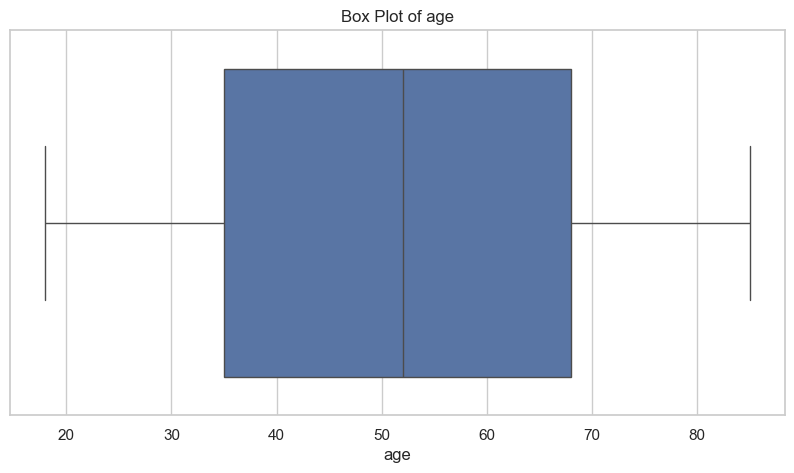

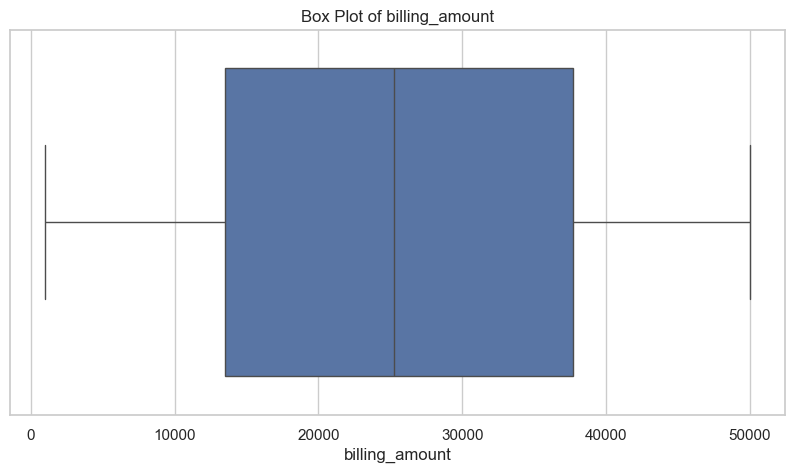

In [257]:
# Box plots to identify outliers
num_cols =['age', 'billing_amount', ]  
for col in num_cols:
#for col in skewness:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[col])
    plt.title(f"Box Plot of {col}")
    plt.show()


***Histogram plot for the continuous numerical data***

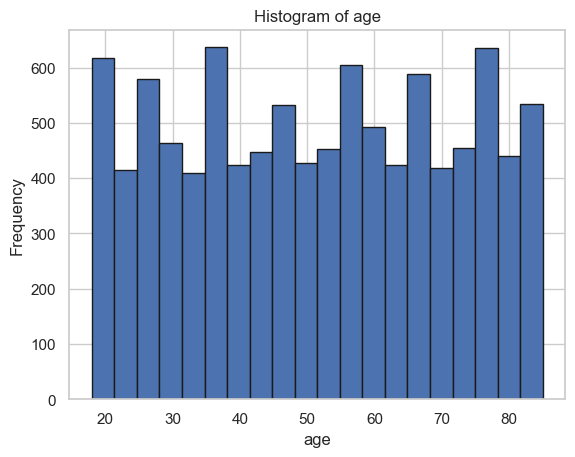

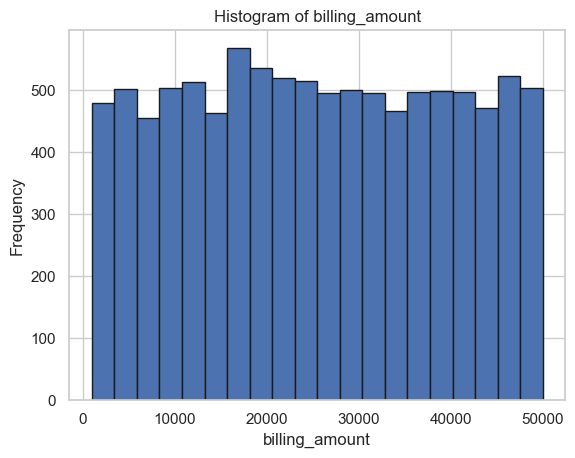

In [260]:

#Histogram plot
columns_to_plot = ['age', 'billing_amount', ]  
for col in columns_to_plot:
    plt.figure()
    df[col].hist(bins=20, edgecolor='k')
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


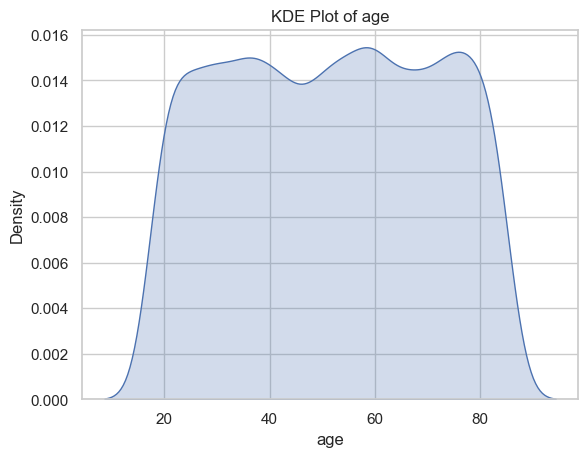

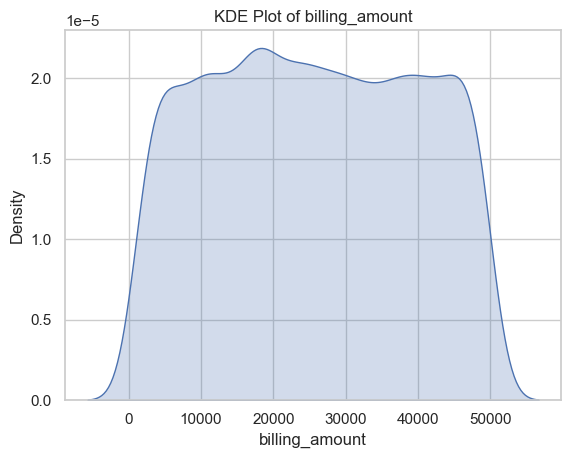

In [262]:

# columns_to_plot = ['encounter_id','patient_id','age','doctor_id','hospital_id', 'billing_amount', 'hospital_id']  
columns_to_plot = ['age', 'billing_amount', ]  
for col in columns_to_plot:
    plt.figure()
    sns.kdeplot(df[col], shade=True)
    plt.title(f"KDE Plot of {col}")


***columns like enounter_id,patient_id,doctor_id,hospital_id,room_number are numeric with categorical values, they can be excluded from statistical analyses like skewness because,these are identifiers rather than measured values.***

***In the dataset the remaining numerical columns are age,billing_amount and length_of_stay. length_of_stay also has to be excluded from statistical analyses since it is the target column.***

In [265]:
display(df)

,encounter_id,patient_id,name,age,gender,blood_type,medical_condition,doctor_id,doctor,hospital_id,hospital,insurance_provider_id,insurance_provider,billing_amount,room_number,admission_type,date_of_admission,discharge_date,medication,test_results,length_of_stay
0,1,48559735,Tiffany Ramirez,81,Female,O-,Diabetes,24379,Patrick Parker,8130,Wallace-Hamilton,17536,Medicare,37490.983364,146,Elective,2022-11-17,2022-12-01,Aspirin,Inconclusive,14
1,2,68988993,Ruben Burns,35,Male,O+,Asthma,54845,Diane Jackson,7856,"Burke, Griffin and Cooper",97562,UnitedHealthcare,47304.064845,404,Emergency,2023-06-01,2023-06-15,Lipitor,Normal,14
2,3,57429465,Chad Byrd,61,Male,B-,Obesity,88087,Paul Baker,4494,Walton LLC,36710,Medicare,36874.896997,292,Emergency,2019-01-09,2019-02-08,Lipitor,Normal,30
3,4,44487379,Antonio Frederick,49,Male,B-,Asthma,22426,Brian Chandler,8117,Garcia Ltd,70210,Medicare,23303.322092,480,Urgent,2020-05-02,2020-05-03,Penicillin,Abnormal,1
4,5,57789449,Mrs. Brandy Flowers,51,Male,O-,Arthritis,84765,Dustin Griffin,7259,"Jones, Brown and Murray",92038,UnitedHealthcare,18086.344184,477,Urgent,2021-07-09,2021-08-02,Paracetamol,Normal,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,92106285,James Hood,83,Male,A+,Obesity,29623,Samuel Moody,3914,"Wood, Martin and Simmons",11695,UnitedHealthcare,39606.840083,110,Elective,2022-07-29,2022-08-02,Ibuprofen,Abnormal,4
9996,9997,37699698,Stephanie Evans,47,Female,AB+,Arthritis,21531,Christopher Yates,2035,Nash-Krueger,24850,Blue Cross,5995.717488,244,Emergency,2022-01-06,2022-01-29,Ibuprofen,Normal,23
9997,9998,69001727,Christopher Martinez,54,Male,B-,Arthritis,86553,Robert Nicholson,6375,Larson and Sons,10614,Blue Cross,49559.202905,312,Elective,2022-07-01,2022-07-15,Ibuprofen,Normal,14
9998,9999,55907201,Amanda Duke,84,Male,A+,Arthritis,85611,Jamie Lewis,8854,Wilson-Lyons,51516,UnitedHealthcare,25236.344761,420,Urgent,2020-02-06,2020-02-26,Penicillin,Normal,20


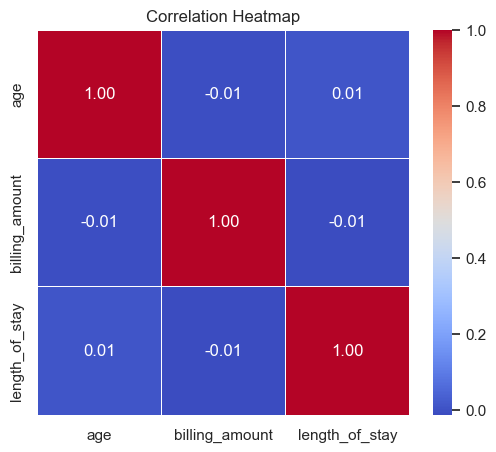

In [267]:
# Compute the correlation matrix
# Select relevant columns
columns_to_plot = ['age', 'billing_amount', 'length_of_stay']
corr_matrix = df[columns_to_plot].corr()

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [269]:
categorical_columns = ['name', 'gender', 'blood_type', 'medical_condition', 'doctor', 'hospital', 'insurance_provider', 'admission_type',
                       'date_of_admission', 'discharge_date', 'medication', 'test_results']

for col in categorical_columns:
    print(f"Value counts for column: {col}")
    print(df[col].value_counts())
    print("\n")



Value counts for column: name
name
Michael Johnson        7
James Johnson          6
Michael Miller         4
Michelle Williams      4
Scott Smith            4
                      ..
Sharon Rose            1
Stephanie Knox         1
Anthony Jones          1
Melissa Perkins DVM    1
Eric King              1
Name: count, Length: 9378, dtype: int64


Value counts for column: gender
gender
Female    5075
Male      4925
Name: count, dtype: int64


Value counts for column: blood_type
blood_type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64


Value counts for column: medical_condition
medical_condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64


Value counts for column: doctor
doctor
Michael Johnson      7
Robert Brown         5
Michelle Anderson    5
Matthew Smith        5
Jennifer Smith       5
           


# ***<span style="color: red;">Feature Engineering</span>***


# ***Encoding :***
***Machine learning algorithms work with numerical data, and categorical or string data needs to be transformed into numbers. Encoding refers to the process of converting data into a numerical format.***

***There are several categorical columns in our dataset. However we have to follow different encoding approach to the each of them depending upon the characteristic of the feature column. There  are some column which are irrevalant for our processing.***  


***Name             : It can be droped since it is only and identifier and it has not much role in predective analysis.***  

***<span style="color: blue;">gender </span> : There is only two categories,Maler or female .<span style="color: blue;">Label encOding </span>  best suited for this since it does not create any false hierarchies.***  

***<span style="color: Green;">blood_type </span>blood_type       : There are basically four blood types (A,B,AB,O) and these are nominal values with no inherent order.<span style="color: Green;">one hot encoding </span> is much suitable***  

**<span style="color: Green;">medical_condition </span>:With less than 10 unique conditions, one-hot encoding creates a manageable number of new binary columns, such as , , , etc. <span style="color: Green;">One-Hot Encoding </span>  can  account for relationship between condition and length_of_ stay***  

***<span style="color: brown;">doctor </span>           : Act as identifier but it has high cardinality . <span style="color: brown;">frequency encoding </span>  is apted for this feaure***   
***<span style="color: brown;">hospital </span>          : Similar to doctor, serve as an identifier without nominal significance.However due to high cardinality <Span style="color: brown;">frequency encoding</span>  is suited for this***  
***<span style="color: Green;">admission_type </span>   : Admission types are nominal categories hence <span style="color: Green;">one hot encoding </span> is most apted***

***<span style="color: Green;">medication </span>        : Nominal data with diverse categories <span style="color: green;">One-hot encoding </span> is suitable***  
***<span style="color: Green;">test_result </span>       : <span style="color: Green;">One-hot encoding  </span>is suitable for this feature***  


In [272]:
# Display the first two rows for all columns
display(df.head(2))
print(df.columns.to_list())
print("\nFirst Two Rows of Each Column:")
print(df.head(2))  

,encounter_id,patient_id,name,age,gender,blood_type,medical_condition,doctor_id,doctor,hospital_id,hospital,insurance_provider_id,insurance_provider,billing_amount,room_number,admission_type,date_of_admission,discharge_date,medication,test_results,length_of_stay
0,1,48559735,Tiffany Ramirez,81,Female,O-,Diabetes,24379,Patrick Parker,8130,Wallace-Hamilton,17536,Medicare,37490.983364,146,Elective,2022-11-17,2022-12-01,Aspirin,Inconclusive,14
1,2,68988993,Ruben Burns,35,Male,O+,Asthma,54845,Diane Jackson,7856,"Burke, Griffin and Cooper",97562,UnitedHealthcare,47304.064845,404,Emergency,2023-06-01,2023-06-15,Lipitor,Normal,14


['encounter_id', 'patient_id', 'name', 'age', 'gender', 'blood_type', 'medical_condition', 'doctor_id', 'doctor', 'hospital_id', 'hospital', 'insurance_provider_id', 'insurance_provider', 'billing_amount', 'room_number', 'admission_type', 'date_of_admission', 'discharge_date', 'medication', 'test_results', 'length_of_stay']

First Two Rows of Each Column:
   encounter_id  patient_id             name  age  gender blood_type  \
0             1    48559735  Tiffany Ramirez   81  Female         O-   
1             2    68988993      Ruben Burns   35    Male         O+   

  medical_condition  doctor_id          doctor  hospital_id  \
0          Diabetes      24379  Patrick Parker         8130   
1            Asthma      54845   Diane Jackson         7856   

                    hospital  insurance_provider_id insurance_provider  \
0           Wallace-Hamilton                  17536           Medicare   
1  Burke, Griffin and Cooper                  97562   UnitedHealthcare   

   billing_a

***One_hot encogding***

In [275]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
df_one_hot_encoded = pd.get_dummies(data=df,columns =['blood_type', 'medical_condition', 'insurance_provider', 
                   'admission_type', 'medication', 'test_results'])


In [277]:
# to show the entire column while printing
pd.set_option('display.max_columns', None)
display(df_one_hot_encoded.head(2))


,encounter_id,patient_id,name,age,gender,doctor_id,doctor,hospital_id,hospital,insurance_provider_id,billing_amount,room_number,date_of_admission,discharge_date,length_of_stay,blood_type_A+,blood_type_A-,blood_type_AB+,blood_type_AB-,blood_type_B+,blood_type_B-,blood_type_O+,blood_type_O-,medical_condition_Arthritis,medical_condition_Asthma,medical_condition_Cancer,medical_condition_Diabetes,medical_condition_Hypertension,medical_condition_Obesity,insurance_provider_Aetna,insurance_provider_Blue Cross,insurance_provider_Cigna,insurance_provider_Medicare,insurance_provider_UnitedHealthcare,admission_type_Elective,admission_type_Emergency,admission_type_Urgent,medication_Aspirin,medication_Ibuprofen,medication_Lipitor,medication_Paracetamol,medication_Penicillin,test_results_Abnormal,test_results_Inconclusive,test_results_Normal
0,1,48559735,Tiffany Ramirez,81,Female,24379,Patrick Parker,8130,Wallace-Hamilton,17536,37490.983364,146,2022-11-17,2022-12-01,14,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False
1,2,68988993,Ruben Burns,35,Male,54845,Diane Jackson,7856,"Burke, Griffin and Cooper",97562,47304.064845,404,2023-06-01,2023-06-15,14,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True


In [279]:
# print(df_one_hot_encoded) columns
print(', '.join(df_one_hot_encoded .columns))


encounter_id, patient_id, name, age, gender, doctor_id, doctor, hospital_id, hospital, insurance_provider_id, billing_amount, room_number, date_of_admission, discharge_date, length_of_stay, blood_type_A+, blood_type_A-, blood_type_AB+, blood_type_AB-, blood_type_B+, blood_type_B-, blood_type_O+, blood_type_O-, medical_condition_Arthritis, medical_condition_Asthma, medical_condition_Cancer, medical_condition_Diabetes, medical_condition_Hypertension, medical_condition_Obesity, insurance_provider_Aetna, insurance_provider_Blue Cross, insurance_provider_Cigna, insurance_provider_Medicare, insurance_provider_UnitedHealthcare, admission_type_Elective, admission_type_Emergency, admission_type_Urgent, medication_Aspirin, medication_Ibuprofen, medication_Lipitor, medication_Paracetamol, medication_Penicillin, test_results_Abnormal, test_results_Inconclusive, test_results_Normal


***Calculate the blood_type count***

In [282]:
blood_type_counts = df_one_hot_encoded[['blood_type_A+', 'blood_type_A-', 'blood_type_AB+', 
                                        'blood_type_AB-', 'blood_type_B+', 'blood_type_B-', 
                                        'blood_type_O+', 'blood_type_O-']].sum()
print(blood_type_counts)


blood_type_A+     1241
blood_type_A-     1238
blood_type_AB+    1258
blood_type_AB-    1275
blood_type_B+     1244
blood_type_B-     1252
blood_type_O+     1248
blood_type_O-     1244
dtype: int64


***Bar plot of the blood type based on the count***

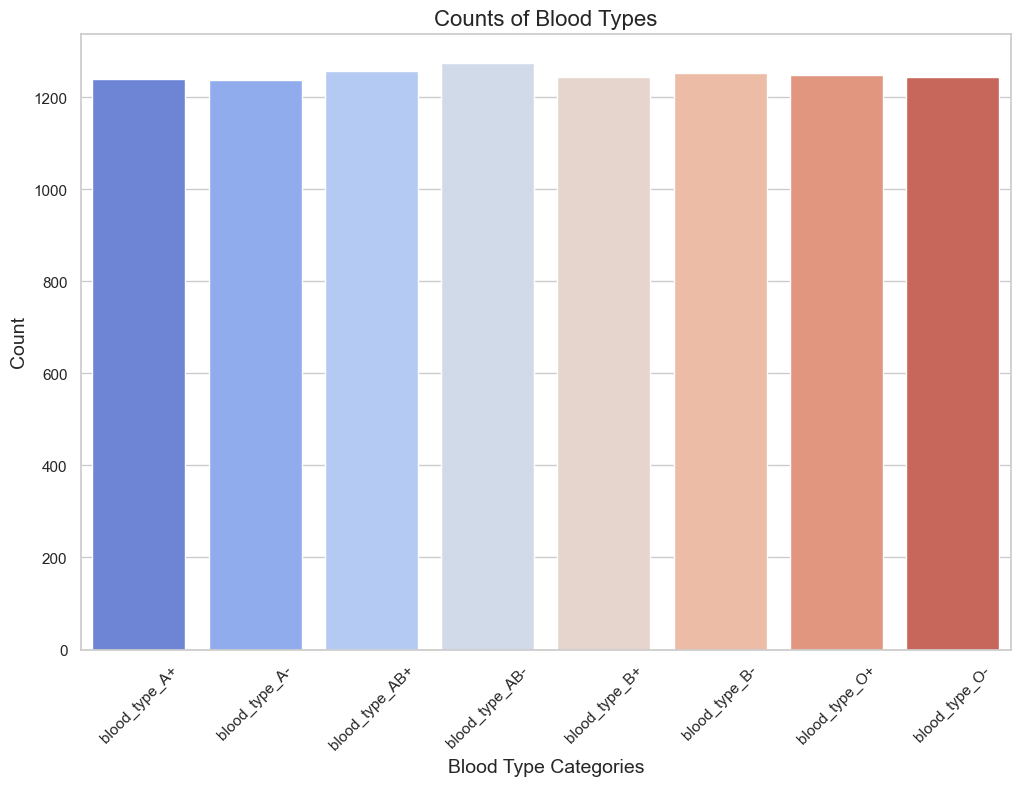

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt

#  `blood_type_counts` 
blood_type_counts = df_one_hot_encoded[['blood_type_A+', 'blood_type_A-', 'blood_type_AB+', 
                                        'blood_type_AB-', 'blood_type_B+', 'blood_type_B-', 
                                        'blood_type_O+', 'blood_type_O-']].sum()

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=blood_type_counts.index, y=blood_type_counts.values, palette="coolwarm")

# Add labels and title
plt.title("Counts of Blood Types", fontsize=16)
plt.xlabel("Blood Type Categories", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


***Calculate the medical_condition_counts***

In [288]:
 
medical_condition_counts= df_one_hot_encoded[['medical_condition_Arthritis', 'medical_condition_Asthma', 'medical_condition_Cancer', 
                                        'medical_condition_Diabetes', 'medical_condition_Hypertension', 'medical_condition_Obesity', ]].sum()
print(medical_condition_counts)


medical_condition_Arthritis       1650
medical_condition_Asthma          1708
medical_condition_Cancer          1703
medical_condition_Diabetes        1623
medical_condition_Hypertension    1688
medical_condition_Obesity         1628
dtype: int64


***Bar plot of the medical_condition based on the count***

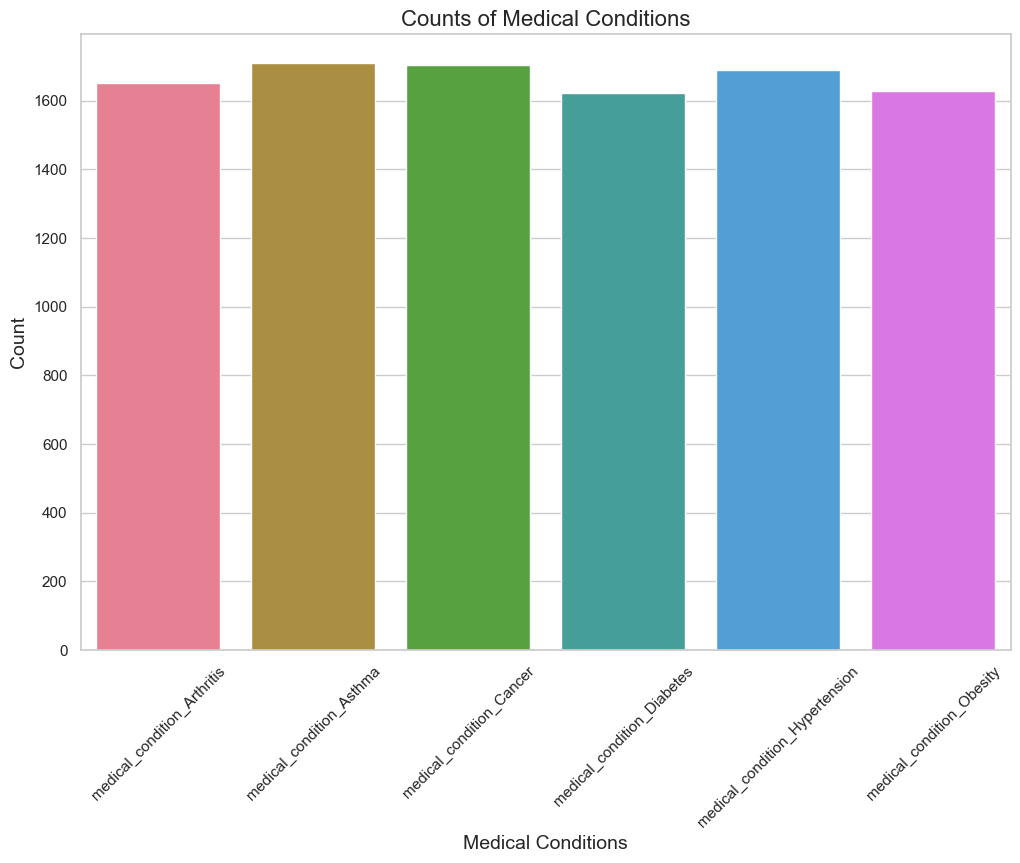

In [291]:
import seaborn as sns
import matplotlib.pyplot as plt

#  `medical_condition_counts`
medical_condition_counts = df_one_hot_encoded[['medical_condition_Arthritis', 'medical_condition_Asthma', 'medical_condition_Cancer', 
                                               'medical_condition_Diabetes', 'medical_condition_Hypertension', 'medical_condition_Obesity']].sum()

# Create a bar plot
plt.figure(figsize=(12, 8))
colors = sns.color_palette("husl", len(medical_condition_counts))  # Generate unique colors
sns.barplot(x=medical_condition_counts.index, y=medical_condition_counts.values, palette=colors)


# sns.barplot(x=medical_condition_counts.index, y=medical_condition_counts.values, palette="coolwarm")

# Add labels and title
plt.title("Counts of Medical Conditions", fontsize=16)
plt.xlabel("Medical Conditions", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


***Density plot of the medical_condition***

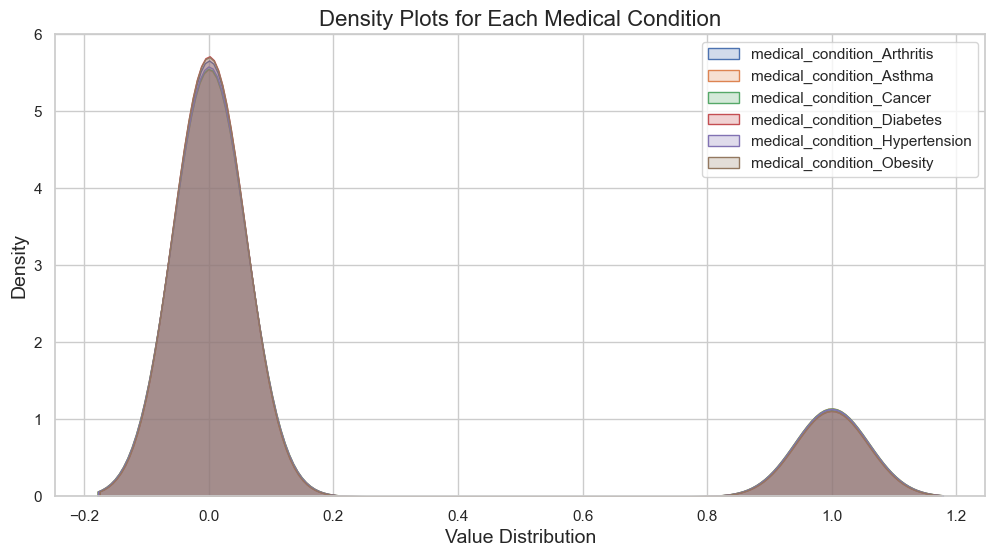

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the figure size
plt.figure(figsize=(12, 6))

# Sum the occurrences of medical conditions
medical_condition_counts = df_one_hot_encoded[['medical_condition_Arthritis', 'medical_condition_Asthma',
                                              'medical_condition_Cancer', 'medical_condition_Diabetes',
                                              'medical_condition_Hypertension', 'medical_condition_Obesity']].sum()

# Loop through each medical condition and plot its density
for condition in medical_condition_counts.index:
    sns.kdeplot(df_one_hot_encoded[condition], fill=True, label=condition)

# Add labels and title
plt.title("Density Plots for Each Medical Condition", fontsize=16)
plt.xlabel("Value Distribution", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.legend()  # Add legend for clarity
plt.show()


***Violin Plot of the Medical condition***

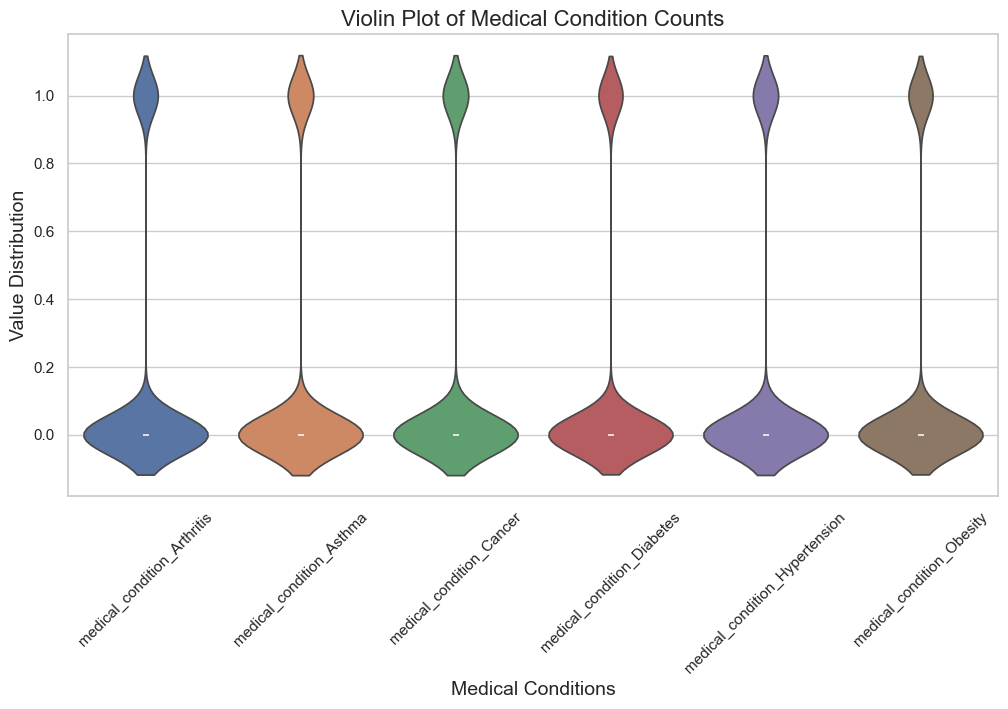

In [296]:

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_one_hot_encoded[['medical_condition_Arthritis', 'medical_condition_Asthma', 
                                        'medical_condition_Cancer', 'medical_condition_Diabetes', 
                                        'medical_condition_Hypertension', 'medical_condition_Obesity']] )

# Add labels and title
plt.title("Violin Plot of Medical Condition Counts", fontsize=16)
plt.xlabel("Medical Conditions", fontsize=14)
plt.ylabel("Value Distribution", fontsize=14)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


In [297]:

medical_insurance_provider_counts = df_one_hot_encoded[['insurance_provider_Aetna', 'insurance_provider_Blue Cross',
                                              'insurance_provider_Cigna', 'insurance_provider_Medicare',
                                              'insurance_provider_UnitedHealthcare' ]].sum()
print(medical_insurance_provider_counts)


insurance_provider_Aetna               2025
insurance_provider_Blue Cross          2032
insurance_provider_Cigna               2040
insurance_provider_Medicare            1925
insurance_provider_UnitedHealthcare    1978
dtype: int64


insurance_provider_Aetna               2025
insurance_provider_Blue Cross          2032
insurance_provider_Cigna               2040
insurance_provider_Medicare            1925
insurance_provider_UnitedHealthcare    1978
dtype: int64


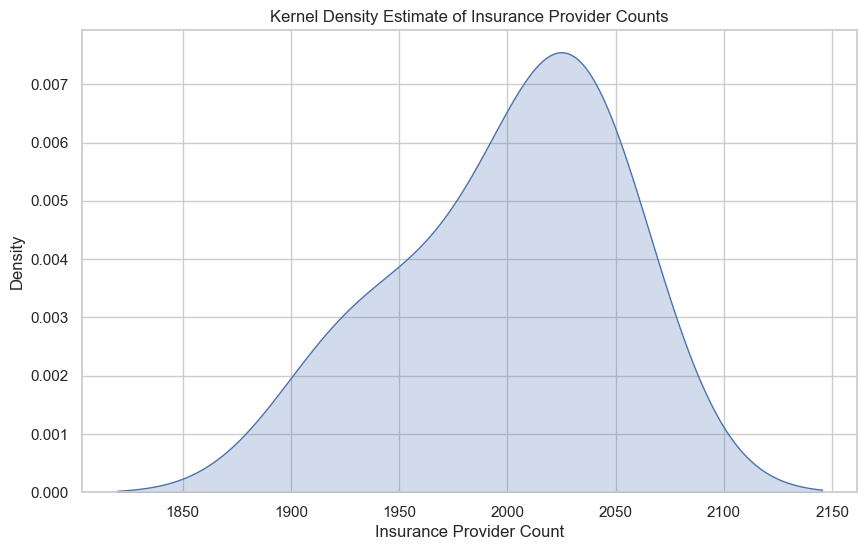

In [299]:
#Calculate the sum of counts for each insurance provider
medical_insurance_provider_counts = df_one_hot_encoded[['insurance_provider_Aetna', 
                                                         'insurance_provider_Blue Cross',
                                                         'insurance_provider_Cigna',
                                                         'insurance_provider_Medicare',
                                                         'insurance_provider_UnitedHealthcare']].sum()

print(medical_insurance_provider_counts)

# Step 4: Create a KDE plot for the counts
plt.figure(figsize=(10, 6))
sns.kdeplot(data=medical_insurance_provider_counts, fill=True)
plt.title('Kernel Density Estimate of Insurance Provider Counts')
plt.xlabel('Insurance Provider Count')
plt.ylabel('Density')
plt.show()

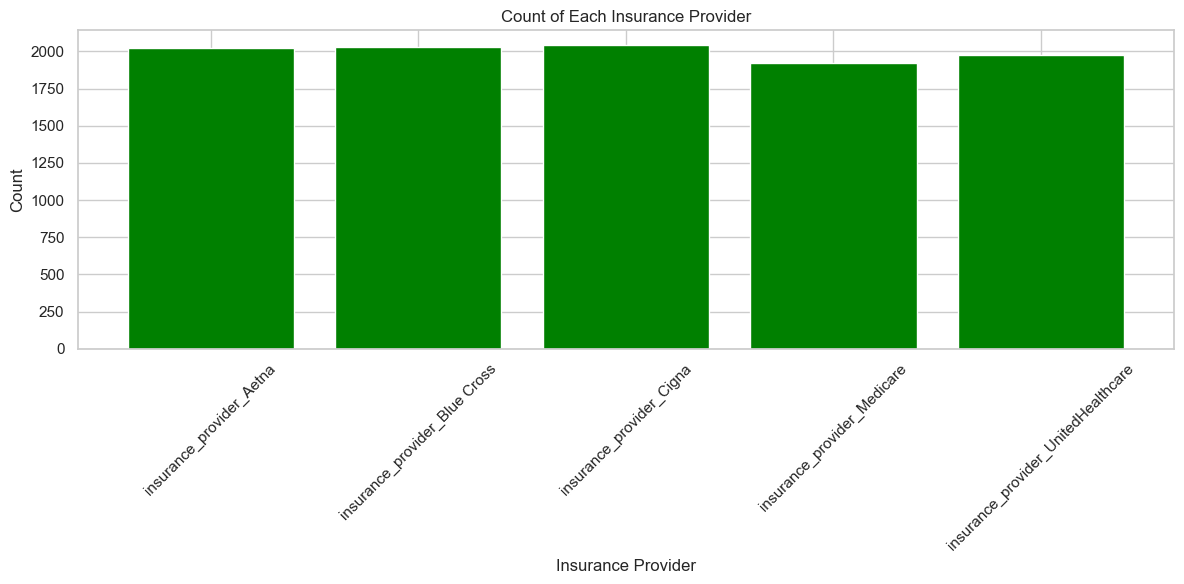

In [300]:
# Calculate the sum of counts for each insurance provider
medical_insurance_provider_counts = df_one_hot_encoded[['insurance_provider_Aetna', 
                                                         'insurance_provider_Blue Cross',
                                                         'insurance_provider_Cigna',
                                                         'insurance_provider_Medicare',
                                                         'insurance_provider_UnitedHealthcare']].sum()

# medical_insurance_provider_counts = df_one_hot_encoded.groupby('insurance_provider').sum()

# Step 4: Create a bar chart for the counts
plt.figure(figsize=(12, 6))
plt.bar(medical_insurance_provider_counts.index, medical_insurance_provider_counts.values, color='green')

# Add title and labels
plt.title('Count of Each Insurance Provider')
plt.xlabel('Insurance Provider')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.tight_layout()
plt.show()

***Admission_Type_count***

In [304]:


admission_type_count=df_one_hot_encoded[['admission_type_Elective', 
                                                         'admission_type_Emergency',
                                                         'admission_type_Urgent']].sum()
print(admission_type_count)



admission_type_Elective     3242
admission_type_Emergency    3367
admission_type_Urgent       3391
dtype: int64


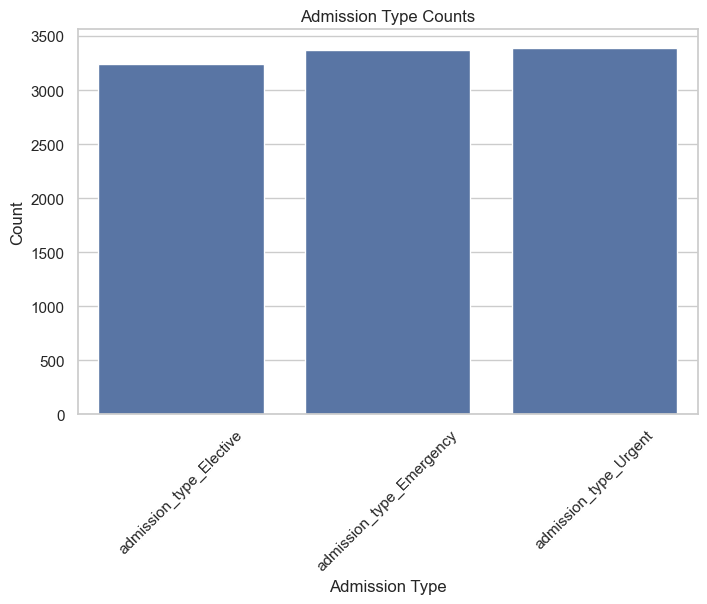

In [306]:
import matplotlib.pyplot as plt
import seaborn as sns


# Convert to DataFrame for plotting
admission_type_count_df = admission_type_count.to_frame(name='Count')
admission_type_count_df['Admission Type'] = admission_type_count_df.index

# Create the bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Admission Type', y='Count', data=admission_type_count_df)

plt.xticks(rotation=45)
plt.xlabel('Admission Type')
plt.ylabel('Count')
plt.title('Admission Type Counts')

plt.show()



In [308]:
admission_type_count=df_one_hot_encoded[['admission_type_Elective', 
                                                         'admission_type_Emergency',
                                                         'admission_type_Urgent']].sum()
print(admission_type_count)


admission_type_Elective     3242
admission_type_Emergency    3367
admission_type_Urgent       3391
dtype: int64


In [310]:
display(df_one_hot_encoded)

,encounter_id,patient_id,name,age,gender,doctor_id,doctor,hospital_id,hospital,insurance_provider_id,billing_amount,room_number,date_of_admission,discharge_date,length_of_stay,blood_type_A+,blood_type_A-,blood_type_AB+,blood_type_AB-,blood_type_B+,blood_type_B-,blood_type_O+,blood_type_O-,medical_condition_Arthritis,medical_condition_Asthma,medical_condition_Cancer,medical_condition_Diabetes,medical_condition_Hypertension,medical_condition_Obesity,insurance_provider_Aetna,insurance_provider_Blue Cross,insurance_provider_Cigna,insurance_provider_Medicare,insurance_provider_UnitedHealthcare,admission_type_Elective,admission_type_Emergency,admission_type_Urgent,medication_Aspirin,medication_Ibuprofen,medication_Lipitor,medication_Paracetamol,medication_Penicillin,test_results_Abnormal,test_results_Inconclusive,test_results_Normal
0,1,48559735,Tiffany Ramirez,81,Female,24379,Patrick Parker,8130,Wallace-Hamilton,17536,37490.983364,146,2022-11-17,2022-12-01,14,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False
1,2,68988993,Ruben Burns,35,Male,54845,Diane Jackson,7856,"Burke, Griffin and Cooper",97562,47304.064845,404,2023-06-01,2023-06-15,14,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True
2,3,57429465,Chad Byrd,61,Male,88087,Paul Baker,4494,Walton LLC,36710,36874.896997,292,2019-01-09,2019-02-08,30,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,True
3,4,44487379,Antonio Frederick,49,Male,22426,Brian Chandler,8117,Garcia Ltd,70210,23303.322092,480,2020-05-02,2020-05-03,1,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,True,False,False
4,5,57789449,Mrs. Brandy Flowers,51,Male,84765,Dustin Griffin,7259,"Jones, Brown and Murray",92038,18086.344184,477,2021-07-09,2021-08-02,24,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,92106285,James Hood,83,Male,29623,Samuel Moody,3914,"Wood, Martin and Simmons",11695,39606.840083,110,2022-07-29,2022-08-02,4,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False
9996,9997,37699698,Stephanie Evans,47,Female,21531,Christopher Yates,2035,Nash-Krueger,24850,5995.717488,244,2022-01-06,2022-01-29,23,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,True
9997,9998,69001727,Christopher Martinez,54,Male,86553,Robert Nicholson,6375,Larson and Sons,10614,49559.202905,312,2022-07-01,2022-07-15,14,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True
9998,9999,55907201,Amanda Duke,84,Male,85611,Jamie Lewis,8854,Wilson-Lyons,51516,25236.344761,420,2020-02-06,2020-02-26,20,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,True,False,False,True


***Label encoding***

In [315]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
df = pd.DataFrame(df_one_hot_encoded)
# Columns to label encode
label_columns = ['gender']

# Initialize Label Encoder
label_encoder = LabelEncoder()

# Apply label encoding for each column in place
for column in label_columns:
    df[column] = label_encoder.fit_transform(df_one_hot_encoded[column])

# Display the result
display(df.head(2))


,encounter_id,patient_id,name,age,gender,doctor_id,doctor,hospital_id,hospital,insurance_provider_id,billing_amount,room_number,date_of_admission,discharge_date,length_of_stay,blood_type_A+,blood_type_A-,blood_type_AB+,blood_type_AB-,blood_type_B+,blood_type_B-,blood_type_O+,blood_type_O-,medical_condition_Arthritis,medical_condition_Asthma,medical_condition_Cancer,medical_condition_Diabetes,medical_condition_Hypertension,medical_condition_Obesity,insurance_provider_Aetna,insurance_provider_Blue Cross,insurance_provider_Cigna,insurance_provider_Medicare,insurance_provider_UnitedHealthcare,admission_type_Elective,admission_type_Emergency,admission_type_Urgent,medication_Aspirin,medication_Ibuprofen,medication_Lipitor,medication_Paracetamol,medication_Penicillin,test_results_Abnormal,test_results_Inconclusive,test_results_Normal
0,1,48559735,Tiffany Ramirez,81,0,24379,Patrick Parker,8130,Wallace-Hamilton,17536,37490.983364,146,2022-11-17,2022-12-01,14,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False
1,2,68988993,Ruben Burns,35,1,54845,Diane Jackson,7856,"Burke, Griffin and Cooper",97562,47304.064845,404,2023-06-01,2023-06-15,14,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True


***Frequency encoding***

In [318]:

df_one_hot_encoded=df
# Create frequency encoding for 'doctor' column
doctor_freq = df['doctor'].value_counts().to_dict()
df['doctor'] = df['doctor'].map(doctor_freq)

# Create frequency encoding for 'hospital' column
hospital_freq = df['hospital'].value_counts().to_dict()
df['hospital'] = df['hospital'].map(hospital_freq)

print("Frequency Encoded DataFrame:")
print(df[['doctor', 'hospital', ]])



Frequency Encoded DataFrame:
      doctor  hospital
0          1         1
1          1         1
2          1         1
3          1         3
4          1         1
...      ...       ...
9995       1         1
9996       1         1
9997       1         2
9998       1         1
9999       1         1

[10000 rows x 2 columns]


In [320]:
display(df.head(2))

,encounter_id,patient_id,name,age,gender,doctor_id,doctor,hospital_id,hospital,insurance_provider_id,billing_amount,room_number,date_of_admission,discharge_date,length_of_stay,blood_type_A+,blood_type_A-,blood_type_AB+,blood_type_AB-,blood_type_B+,blood_type_B-,blood_type_O+,blood_type_O-,medical_condition_Arthritis,medical_condition_Asthma,medical_condition_Cancer,medical_condition_Diabetes,medical_condition_Hypertension,medical_condition_Obesity,insurance_provider_Aetna,insurance_provider_Blue Cross,insurance_provider_Cigna,insurance_provider_Medicare,insurance_provider_UnitedHealthcare,admission_type_Elective,admission_type_Emergency,admission_type_Urgent,medication_Aspirin,medication_Ibuprofen,medication_Lipitor,medication_Paracetamol,medication_Penicillin,test_results_Abnormal,test_results_Inconclusive,test_results_Normal
0,1,48559735,Tiffany Ramirez,81,0,24379,1,8130,1,17536,37490.983364,146,2022-11-17,2022-12-01,14,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,False,True,False
1,2,68988993,Ruben Burns,35,1,54845,1,7856,1,97562,47304.064845,404,2023-06-01,2023-06-15,14,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,True


***Save the copy of the encoded file***

In [323]:
df.to_csv("df_encoded.csv", index=False)


***Distribution of the freqency encoded doctor and Hospital Categorical values which has high cardinality***

In [ ]:
import matplotlib.pyplot as plt

# Plot frequency encoding for 'doctor'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(doctor_freq.keys(), doctor_freq.values(), color='skyblue')
plt.xlabel('Doctor')
plt.ylabel('Frequency')
plt.title('Doctor Frequency Encoding')

# Plot frequency encoding for 'hospital'
plt.subplot(1, 2, 2)
plt.bar(hospital_freq.keys(), hospital_freq.values(), color='salmon')
plt.xlabel('Hospital')
plt.ylabel('Frequency')
plt.title('Hospital Frequency Encoding')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [ ]:
# Create a pivot table counting occurrences
heatmap_data = df.pivot_table(index="doctor", columns="hospital", aggfunc="size", fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", annot=True, fmt="d", linewidths=0.5)
plt.title("Doctor-Hospital Frequency Heatmap")
plt.xticks(rotation=90)
plt.show()


***Data distribution and visualization***

In [ ]:

num_cols = ['age', 'billing_amount', 'length_of_stay']
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

# Count plots for categorical columns
cat_cols = ['gender', 'medical_condition_Arthritis', 'medical_condition_Asthma', 'medical_condition_Cancer', 
            'medical_condition_Diabetes', 'medical_condition_Hypertension', 'medical_condition_Obesity',
            'insurance_provider_Aetna', 'insurance_provider_Blue Cross',  'insurance_provider_Cigna',
             'insurance_provider_Medicare', 'insurance_provider_UnitedHealthcare', 'blood_type_A+', 
            'blood_type_A-', 'blood_type_AB+', 'blood_type_AB-', 'blood_type_B+', 'blood_type_B-', 
             'blood_type_O+', 'blood_type_O-', 'admission_type_Elective', 'admission_type_Emergency',
                                                         'admission_type_Urgent']
for col in cat_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df[col], edgecolor='k')
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()


***Correlation Analysis***

In [ ]:
# Correlation matrix for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
#  #Correlation with target variable
# print(df.corr()['lenth_of_stay'].sort_values(ascending=False))
df_for_train=df.drop(columns=['name','date_of_admission','discharge_date'])
correlation_matrix = df_for_train.corr()
correlations = correlation_matrix['length_of_stay'].sort_values(ascending=False)

# Display results
print(correlations)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
print(df.select_dtypes(include=['object']).head())


In [ ]:
correlation_matrix = df.select_dtypes(include=['number']).corr()
correlations = correlation_matrix['length_of_stay'].sort_values(ascending=False)
print(correlations)


***Feature scaling is a preprocessing technique that transforms feature values to a similar scale, ensuring all features contribute equally to the model***

***Separate Numerical and Categorical Features***

In [ ]:
# categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
# numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# X_categorical = df[categorical_cols]
# X_numerical = df[numerical_cols]
# y = df['length_of_stay']
# print("Categorical_columns:{X_categorical})
# print(X_numerical)
df = pd.read_csv("df_encoded.csv")

cat_cols = df.select_dtypes(include=['object', 'bool']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

X_categorical = df[cat_cols]
X_numerical = df[num_cols]
y = df['length_of_stay']

print(f"Categorical Columns: {X_categorical.columns}")  # Corrected print statement
print(f"Numerical Columns: {X_numerical.columns}")
# print(X_numerical)
    

In [ ]:
# calculate correlation mmatrix
correlation_matrix=X_numerical.corr()
correlation_matrix

In [ ]:
correlation_matrix = X_numerical.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))  # Set figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


feature selection

kbest

In [ ]:
# df = pd.read_csv("df_encoded.csv")
# df=df.drop(columns=['name','date_of_admission','discharge_date',])
# cat_cols = df.select_dtypes(include=['object', 'bool']).columns
# num_cols = df.select_dtypes(include=['int64', 'float64']).columns
# X_categorical = df[cat_cols]
# X_numerical = df[num_cols]
# y = df['length_of_stay']
# # X_categorical = df[cat_cols]
# # X_numerical = df[num_cols]
# # X_categorical = df.drop(columns=['name','date_of_admission','discharge_date'])# Chi-Square Test for categorical columns
# # x_numerical=df.drop(columns=['length_of_stay'])
# chi_selector=SelectKBest(chi2,k=20)
# X_chi=chi_selector.fit_transform(X_categorical,y)
# chi_selected_features=X_categorical.columns[chi_selector.get_support()]
# # Anova for numerical columns
# f_selector=SelectKBest(f_classif,k=6)
# X_f=f_selector.fit_transform(X_numerical,y)
# f_selected_features=X_numerical.columns[f_selector.get_support()]

# print("chi_squared selected features:",chi_selected_features)
# print("ANNOVA selected features:",f_selected_features)


In [11]:
import numpy as np
df = pd.read_csv("df_encoded.csv")

# boston = load_boston()
X= df.drop(columns=['name','date_of_admission','discharge_date','length_of_stay'])  # Features
y = df['length_of_stay']  # Target

select = SelectKBest(score_func=f_regression, k=8)
X_selected= select.fit_transform(X, y)
# Get selected feature names and scores
selected_features = X.columns[select.get_support()]
selected_scores = select.scores_[select.get_support()]

print("Selected Features:\n", selected_features)
print("Feature Scores based on select_k:\n", selected_scores)


Selected Features:
 Index(['insurance_provider_id', 'billing_amount', 'blood_type_A-',
       'medical_condition_Arthritis', 'insurance_provider_Medicare',
       'insurance_provider_UnitedHealthcare', 'medication_Penicillin',
       'test_results_Abnormal'],
      dtype='object')
Feature Scores based on select_k:
 [8.7518406  1.824279   5.49111084 4.89398341 1.79218952 1.63950037
 1.32329977 1.1354936 ]


In [428]:
features = np.array(df.columns)  # Original feature names
print("Original number of features:", features.shape)
print("Selected number of features:", filter.shape)


Original number of features: (45,)
Selected number of features: (41,)


***Spliting the data for Training & Test***

In [431]:
# X_selected = df[list(chi_selected_features) + list(f_selected_features)]
# X_selected = df[list(chi_selected_features) + list(f_selected_features)].drop(columns=['length_of_stay'])
# y = df['length_of_stay']  # Target variable

# # # Ensure 'length_of_stay' is removed from feature selection
# selected_features = list(chi_selected_features) + list(f_selected_features)

# # # Remove target column if mistakenly included
# if 'length_of_stay' in selected_features:
#     selected_features.remove('length_of_stay')

# # Create the final feature set
# # X_selected = df[selected_features]
# # X = df

# # # X = df.drop(columns=["length_of_stay",'name','date_of_admission','discharge_date', 'hospital','doctor'])

# # # Define target variable
# # y = df['length_of_stay']




# # # Define features (X) and target (y)
# # X = df.drop(columns=['length_of_stay',])  # Drop target column and the column which has only catergorical value 
# # y = df['length_of_stay']  # Target column                                             #direct impact on target column)
# # X=X_selected
# # y = df['length_of_stay']

# # Split data (80% training, 20% testing)
# X_train_chi_selected_features, X_test_chi_selected_features, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Display dataset sizes

# print("Training Features Shape:", X_train.shape)
# print("Testing Features Shape:", X_test.shape)
# print("Training Labels Shape:", y_train.shape)
# print("Testing Labels Shape:", y_test.shape)


# # print("\nX_train\n:")
# # X_train.head(2)

# # X_test.head(2)
# # y_train
# y_test.head(2)
# # # Split data (80% training, 20% testing)
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Display dataset sizes

# # print("Training Features Shape:", X_train.shape)
# # print("Testing Features Shape:", X_test.shape)
# # print("Training Labels Shape:", y_train.shape)
# # print("Testing Labels Shape:", y_test.shape)


# # print("\nX_train\n:")
# # X_train.head(2)

# # display(X.head(3))

In [13]:
# X= df.drop(columns=['name','date_of_admission','discharge_date','length_of_stay'])  # Features
X= X_selected # Features
y = df['length_of_stay']  # Target

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

print("\n Training data (Features):")
print(X_train)
print("\n Testing data (Features):")
print(X_test)


 Training data (Features):
[[5.30280000e+04 2.06293734e+04 1.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [2.88260000e+04 4.66350842e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.89460000e+04 3.36170181e+03 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.67740000e+04 3.88512736e+04 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.18130000e+04 4.31284522e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [8.37970000e+04 1.61453507e+03 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]

 Testing data (Features):
[[1.46670000e+04 4.82289628e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.23240000e+04 5.63431068e+03 0.00000000e+00 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.57620000e+04 2.58504339e+04 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.88230000e+04 4.65202617e+04 0.00000000e

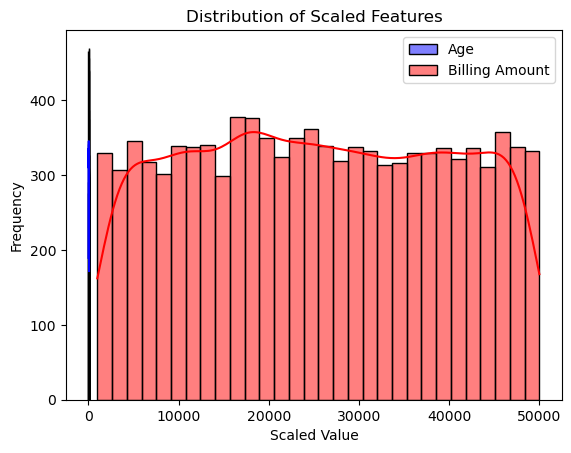

In [17]:
# Plot histograms for age and billing amount
sns.histplot(df['age'], kde=True, color='blue', label='Age', bins=30)
sns.histplot(df['billing_amount'], kde=True, color='red', label='Billing Amount', bins=30)

plt.legend()
plt.title("Distribution of Scaled Features")
plt.xlabel("Scaled Value")
plt.ylabel("Frequency")
plt.show()


***Scatter Plot for Age vs. Length of Stay***

***Since the relationship is not leniar we see clusters***

***The scatter plot for Billing amount Vs Length of Stay***

***compute  Correlation Matrix***

***Plot Heatmap for Correlation Matrix***

In [24]:
# Plot heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix for Numerical Features")
plt.show()


NameError: name 'corr_matrix' is not defined

<Figure size 1000x800 with 0 Axes>

***<div style="text-align: justify">The correlation matrix heatmap reveals that most features in our dataset have weak or no correlation with each other, except for the diagonal values, which are expected since each variable is perfectly correlated with itself ().</div>*** 

***Most correlations  are close to 0, the dataset doesnt have any linear dependencies.  
No obvious multicolinearity- numerical features don't strongly influence each other.  
The Scatter Plot for Age vs. Length of Stay & Billing_amount Vs Lenght of stay is not linear.***


***execute this***

In [210]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# # Read CSV file if needed
# df = pd.read_csv("your_data.csv")  # Replace with actual file name

# Define Features & Target
# X = X_selected  # Selected features after Chi-Square & ANOVA tests
# # X=df.drop(columns=["length_of_stay",'name','date_of_admission','discharge_date',])
# y = df['length_of_stay']  # Target variable

# # Split Data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Scaling Methods
scaler_map = {
    "StandardScaler": StandardScaler(),
    "MinMaxScaler": MinMaxScaler(),
    "RobustScaler": RobustScaler(),
    "LogTransformation": PowerTransformer(method='yeo-johnson'),
    "PowerTransformation": PowerTransformer(method='box-cox', standardize=True)
}

# Define Models
# models = {
#     "Linear Regression": LinearRegression(),
#     "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
#     "Random Forest Regressor": RandomForestRegressor(n_estimators=100, random_state=42),
#     "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, random_state=42),
#     "Support Vector Regressor": SVR()
# }

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=100,random_state=100),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(max_depth=3,n_estimators=100),
    "Support Vector Regressor": SVR(kernel='rbf',max_iter=-1)
}
# Initialize Results Storage
results_df = pd.DataFrame(columns=['Scaler Type', 'Model', 'MSE', 'MAE', 'R²'])

# Loop through each scaling method
for scaler_name, scaler in scaler_map.items():
    try:
        # Apply Scaling
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        print(f"\nApplied {scaler_name} Scaling.")

        # Train & Evaluate Models for Each Scaling Method
        for model_name, model in models.items():
            model.fit(X_train_scaled, y_train)  # Train model
            y_pred = model.predict(X_test_scaled)  # Predict on test set

            # Compute Metrics
            mse = mean_squared_error(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            # Store Results in DataFrame
            results_df = pd.concat([results_df, pd.DataFrame([{
                'Scaler Type': scaler_name,
                'Model': model_name,
                'MSE': mse,
                'MAE': mae,
                'R²': r2
            }])], ignore_index=True)

            print(f"\n{model_name} trained with {scaler_name}. Metrics saved.")

    except Exception as e:
        print(f"⚠️ Error with {scaler_name}: {e}")  # Catch errors

# Display Results
print("\n📊 Model Evaluation Results:")
print(results_df)

# Save Results to CSV (Optional)
results_df.to_csv("model_results.csv", index=False)
print("\nResults saved to 'model_results_after_feature_selection.csv'.")



Applied StandardScaler Scaling.

Linear Regression trained with StandardScaler. Metrics saved.

Decision Tree Regressor trained with StandardScaler. Metrics saved.

Random Forest Regressor trained with StandardScaler. Metrics saved.

Gradient Boosting Regressor trained with StandardScaler. Metrics saved.

Support Vector Regressor trained with StandardScaler. Metrics saved.

Applied MinMaxScaler Scaling.

Linear Regression trained with MinMaxScaler. Metrics saved.

Decision Tree Regressor trained with MinMaxScaler. Metrics saved.

Random Forest Regressor trained with MinMaxScaler. Metrics saved.

Gradient Boosting Regressor trained with MinMaxScaler. Metrics saved.

Support Vector Regressor trained with MinMaxScaler. Metrics saved.

Applied RobustScaler Scaling.

Linear Regression trained with RobustScaler. Metrics saved.

Decision Tree Regressor trained with RobustScaler. Metrics saved.

Random Forest Regressor trained with RobustScaler. Metrics saved.

Gradient Boosting Regressor tra

In [212]:
display(results_df.head(30))

,Scaler Type,Model,MSE,MAE,R²
0,StandardScaler,Linear Regression,74.448682,7.490475,0.002389
1,StandardScaler,Decision Tree Regressor,156.433000,10.292000,-1.096200
2,StandardScaler,Random Forest Regressor,82.895524,7.781955,-0.110799
3,StandardScaler,Gradient Boosting Regressor,74.438979,7.482264,0.002519
4,StandardScaler,Support Vector Regressor,75.095187,7.497784,-0.006274
5,MinMaxScaler,Linear Regression,74.448682,7.490475,0.002389
6,MinMaxScaler,Decision Tree Regressor,156.433000,10.292000,-1.096200
7,MinMaxScaler,Random Forest Regressor,82.889288,7.781695,-0.110715
8,MinMaxScaler,Gradient Boosting Regressor,74.439628,7.482478,0.002510
9,MinMaxScaler,Support Vector Regressor,75.005050,7.493881,-0.005066


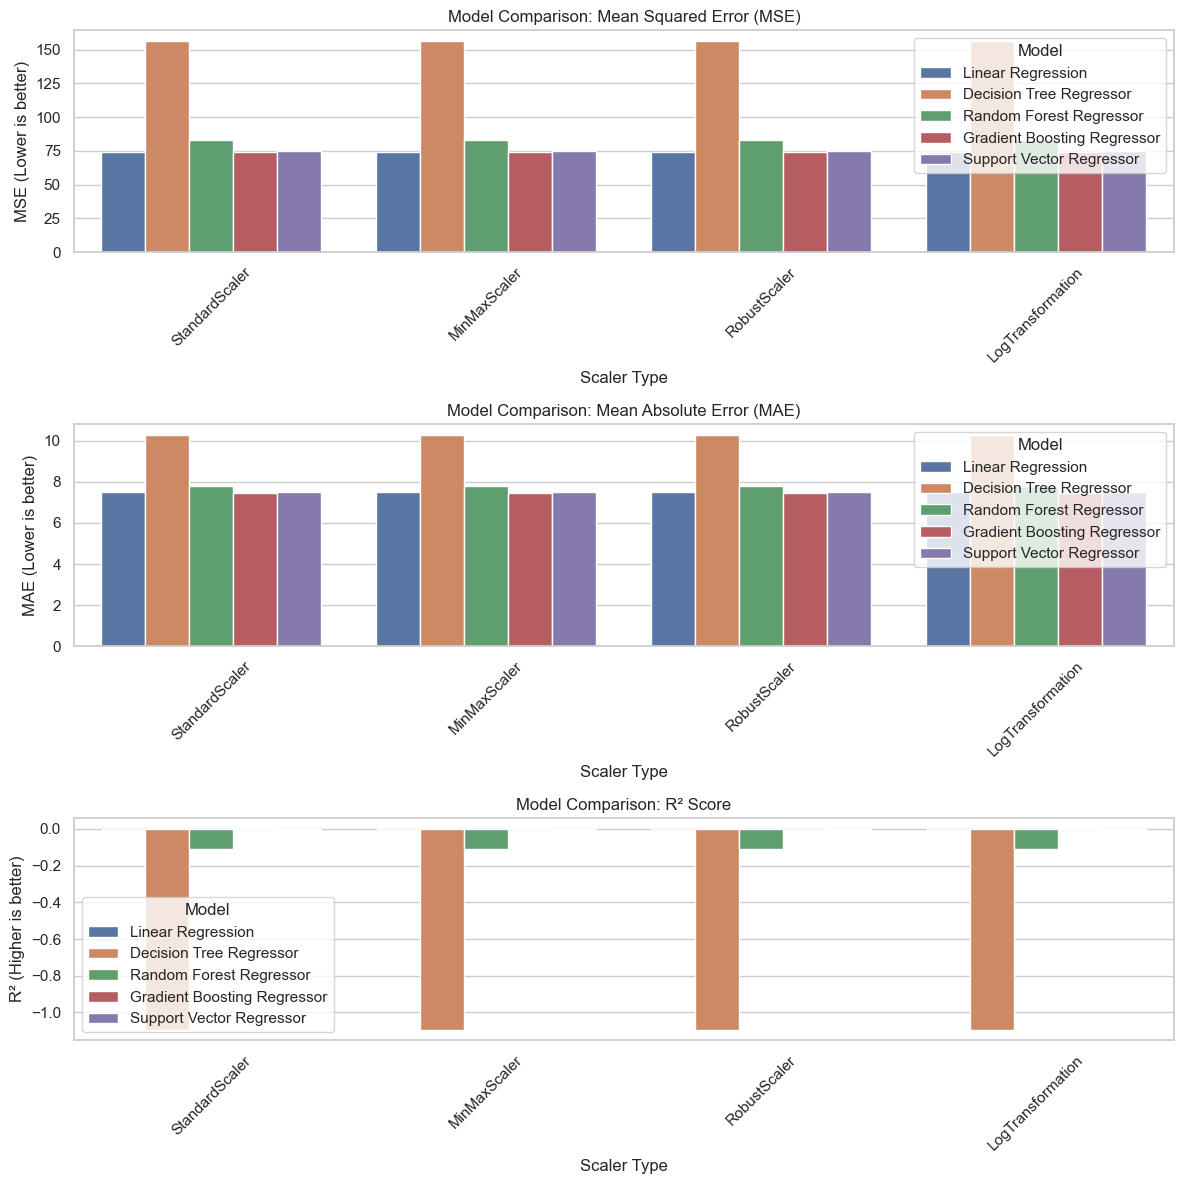

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the results from CSV (if needed)
results_df = pd.read_csv("model_results.csv")

# Set plot style
sns.set_theme(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 12))

# Plot MSE
sns.barplot(data=results_df, x="Scaler Type", y="MSE", hue="Model", ax=axes[0])
axes[0].set_title("Model Comparison: Mean Squared Error (MSE)")
axes[0].set_ylabel("MSE (Lower is better)")
axes[0].set_xticklabels(results_df["Scaler Type"].unique(), rotation=45)

# Plot MAE
sns.barplot(data=results_df, x="Scaler Type", y="MAE", hue="Model", ax=axes[1])
axes[1].set_title("Model Comparison: Mean Absolute Error (MAE)")
axes[1].set_ylabel("MAE (Lower is better)")
axes[1].set_xticklabels(results_df["Scaler Type"].unique(), rotation=45)

# Plot R² Score
sns.barplot(data=results_df, x="Scaler Type", y="R²", hue="Model", ax=axes[2])
axes[2].set_title("Model Comparison: R² Score")
axes[2].set_ylabel("R² (Higher is better)")
axes[2].set_xticklabels(results_df["Scaler Type"].unique(), rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()


# To find overfitting in the models 

In [216]:
from sklearn.linear_model import Ridge

# Overfitting Linear regression using Ridge (L2 regularization)
lin_reg = Ridge(alpha=0.1, max_iter=1000)
lin_reg.fit(X_train, y_train)
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

In [218]:
print("Overfitted Linear Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Linear Regression with L2 - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Linear Regression - Train Accuracy: 0.0023083483456337595
Linear Regression with L2 - Test Accuracy: 0.002388891838943974


In [220]:
#Overfitting Decision tree Regression 
Dec_reg=DecisionTreeRegressor(max_depth=100,random_state=100)
Dec_reg.fit(X_train, y_train)
y_train_pred = Dec_reg.predict(X_train)
y_test_pred = Dec_reg.predict(X_test)

In [222]:
print("Overfitted DecisionTree Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted DecisionTree Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted DecisionTree Regression - Train Accuracy: 1.0
Overfitted DecisionTree Regression - Test Accuracy: -1.096199578492807


In [224]:
#Overfitting Support vector Regression 
supp_reg=SVR(kernel='rbf',verbose=False,max_iter=-1)
supp_reg.fit(X_train, y_train)
y_train_pred = supp_reg.predict(X_train)
y_test_pred = supp_reg.predict(X_test)

In [225]:
print("Overfitted Support Vector Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Support Vector Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Support Vector Regression - Train Accuracy: 0.002126365898855842
Overfitted Support Vector Regression - Test Accuracy: -0.0012464878175566518


In [226]:
# Overfitting Random forest Regression 
Random_reg=RandomForestRegressor(max_depth=100,n_estimators=100)
Random_reg.fit(X_train, y_train)
y_train_pred = Random_reg.predict(X_train)
y_test_pred = Random_reg.predict(X_test)

In [227]:
print("Overfitted Random Forest Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Random Forest Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Random Forest Regression - Train Accuracy: 0.8469085429372085
Overfitted Random Forest Regression - Test Accuracy: -0.11469478208270556


In [232]:
#Overfitting Gradient boosting Regression 
GB_reg=GradientBoostingRegressor(n_estimators=100,random_state=100,max_features=4)
GB_reg.fit(X_train,y_train)
y_train_pred = GB_reg.predict(X_train)
y_test_pred = GB_reg.predict(X_test)

In [156]:
print("Overfitted Gradient Boosting Regression - Train Accuracy:", r2_score(y_train, y_train_pred))
print("Overfitted Gradient Boosting Regression - Test Accuracy:", r2_score(y_test, y_test_pred))

Overfitted Gradient Boosting Regression - Train Accuracy: 0.046923943493526354
Overfitted Gradient Boosting Regression - Test Accuracy: -0.0016812469009366282


# CROSS VALIDATION

In [204]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
# Initialize Decision Tree Regression model
model2 = DecisionTreeRegressor()

# K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds

# Perform cross-validation and get scores (default scoring is R^2)
scores = cross_val_score(model2, X_train, y_train, cv=kf, scoring='r2')

print("Cross-Validation R² Scores:", scores)
print("Mean R² Score:", np.mean(scores))

# If Mean Squared Error (MSE) as the evaluation metric
mse_scores = -cross_val_score(model2, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
print("Cross-Validation MSE Scores:", mse_scores)
print("Mean MSE Score:", np.mean(mse_scores))

Cross-Validation R² Scores: [-1.00077287 -1.07569824 -0.97027418 -1.10579386 -0.96578106]
Mean R² Score: -1.0236640430302775
Cross-Validation MSE Scores: [149.04875 151.4975  150.4025  153.92375 149.61125]
Mean MSE Score: 150.89675000000003


In [256]:

worst_model = min(model_results, key=lambda x: model_results[x].get("R2", float("inf")), default=None)

if best_model is None or worst_model is None:
    print("No valid models found.")
else:
    print("best_model:", best_model, model_results[best_model])
    print("worst_model:", worst_model, model_results[worst_model])


No valid models found.


In [258]:
best_model = max(model_results, key=lambda x: model_results[x].get("MSE", float("inf")), default=None)
worst_model = min(model_results, key=lambda x: model_results[x].get("MSE", float("-inf")), default=None)

if best_model is None or worst_model is None:
    print("No valid models found.")
else:
    print("best_model:", best_model, model_results[best_model])
    print("worst_model:", worst_model, model_results[worst_model])


No valid models found.
